# **Задача 2**

Данная задача представляет собой Capacitated Vehicle Routing Problem (CVRP) с некоторыми ограничениями.
Capacitated Vehicle Routing Problem (CVRP) — это задача маршрутизации транспортных средств с учётом ограничений по ёмкости.

Чтобы решить CVRP необходимо разбить задачу на подзадачи:

1. Создание кластеров из узлов (достопримечаткльностей и перекрестков), эта часть представляет собой "задачу рюкзака".
2. Решение задачи коммивояжера (TSP) для каждого из кластеров.

Для создания узкльных кластеров предлагается следующее решение из двух шагов:

1. Создание начальных кластеров с учетом емкости автобуса.
2. Улучшение кластеров (достижение минимальных путей)

Для создания начальных кластеров можно воспользоваться следующим алгоритмом:
1. Начинаем с узла, наиболее удаленного от вокзала.
2. Запустить цикл, в каждой итерации которого к кластеру будет добавляться узел, наиболее близкий к средней позиции текущих узлов в кластере. Например, второй узел - ближайщий к первому, третий - ближайший к средней позиции первого и второго и так далее.

Для улучшения кластеров следует переназначить узел в другой кластер, если это приведет к тому, что клиент окажется ближе к среднему положению нового кластера, чем к текущему кластеру, при этом не превышая ограничение по ёмкости нового кластера. Продолжайте выполнять шаги улучшения кластеров, пока не станет невозможным сделать больше шагов или пока не будет выполнено 10 шагов улучшения.

Далее следует решить TSP (минимизация стоимости/длительности маршрута) для каждого из кластеров. Для решения преобразуем TSP в QUBO задачу.
Для $N$ узлоа используем $N^2$ бинарных перемннных $x(i,j)$, где i - индекс узла, j - номер узла в маршруте, $x(i, j)$ = 1, если i-ый узел посещается j-ым и $x(i, j)$ = 0 в другом случае.

Чтобы поставить ограничения в виде посещения одного узла единожды и посещения одного города за один шаг:

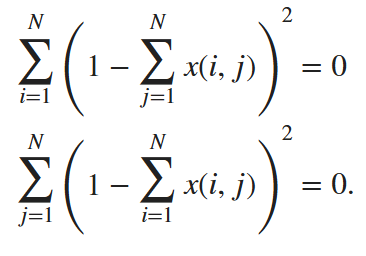

Если какие-то из узлов недоступны из других:

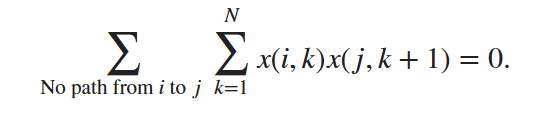


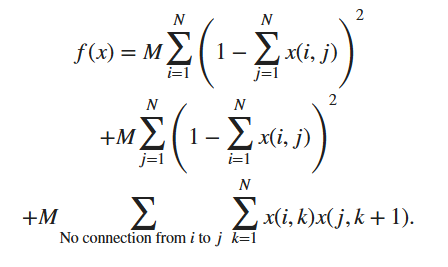

Функция, перобразующая матрицу расстояний в QUBO матрицу

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
import pandas as pd

def tsp2qubo(dist, M):
  N = dist.shape[0]
  A = np.eye(N)
  B = np.ones((N, N))
  Q0 = np.kron(A, B)
  Q1 = np.kron(B, A)
  v = np.ones(N - 1)
  A2 = np.diag(v, 1)
  Q2 = np.kron(B, A2)
  C = np.kron(dist, B)
  Q2 = Q2 * C
  E = np.zeros((N, N))
  E[0, N - 1] = 1
  Q3 = np.kron(B, E)
  CP = np.kron(np.transpose(dist), B)
  Q3 = Q3 * CP
  QN = csr_matrix(M * (Q0 + Q1) * N ** 2 + Q2 + Q3)
  QN = (QN + np.transpose(QN)) / 2
  return QN